***

*Course:* [Math 535](https://people.math.wisc.edu/~roch/mmids/) - Mathematical Methods in Data Science (MMiDS)  
*Chapter:* 1-Introduction   
*Section:* 1.1-Motivating example: species delimitation    
*Author:* [Sebastien Roch](https://people.math.wisc.edu/~roch/), Department of Mathematics, University of Wisconsin-Madison  
*Updated:* Jan 1, 2024   
*Copyright:* &copy; 2024 Sebastien Roch

***

In [1]:
# PYTHON 3
# BEFORE USING THE CODE IN THESE NOTES, RUN THE FOLLOWING
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from numpy import linalg as LA
from numpy.random import default_rng
rng = default_rng(535)
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [4.00, 2.25] # for high-def figs
#plt.rcParams['figure.dpi'] = 200 # for high-def figs
import pandas as pd
import networkx as nx
import os, sys
sys.path.insert(0, os.path.abspath('../../utils')) # use directory to mmids.py
import mmids

In [2]:
# IF RUNNING ON GOOGLE COLAB, UNCOMMENT THE FOLLOWING CODE CELL
# When prompted, upload: 
#     * penguins-measurements.csv 
# from your local file system
# Dataset available at: https://people.math.wisc.edu/~roch/mmids/
# Alternative instructions: https://colab.research.google.com/notebooks/io.ipynb

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## Motivating example: species delimitation

Here is a [penguin dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/). We will upload the data in the form of a data table (similar to a spreadsheet) called [`DataFrame`](https://pandas.pydata.org/docs/reference/frame.html) in [`pandas`](https://pandas.pydata.org/docs/), where the columns are different measurements (or features) and the rows are different samples. Below, we load the data using [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv#) and show the first $5$ lines of the dataset (see [`DataFrame.head`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)). This dataset is a simplified version (i.e., with some columns removed) of the full dataset, maintained by [Allison Horst](https://allisonhorst.com/) at this [GitHub page](https://github.com/allisonhorst/palmerpenguins/blob/main/README.md). 

In [4]:
# USE PATH TO penguins-measurements.csv
df = pd.read_csv('../../utils/data/penguins-measurements.csv')
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


Observe that this dataset has missing values (i.e., the entries `NaN` above). A common way to deal with this issue is to remove all rows with missing values. This can be done using [`pandas.DataFrame.dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [5]:
df = df.dropna()
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


There are $342$ samples, as can be seen by using [`pandas.DataFrame.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) which gives the dimensions of the DataFrame as a tuple.

In [6]:
df.shape[0]

342

Here is a summary of the data (see [`pandas.DataFrame.describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)).

In [7]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Let's first extract the columns into a Numpy array using [`pandas.DataFrame.to_numpy()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html).

In [8]:
X = df[['bill_length_mm', 'bill_depth_mm', 
        'flipper_length_mm', 'body_mass_g']].to_numpy()
print(X)

[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  50.4   15.7  222.  5750. ]
 [  45.2   14.8  212.  5200. ]
 [  49.9   16.1  213.  5400. ]]


We visualize two measurements in the data, the bill depth and flipper length. (The original dataset used the more precise term [culmen](https://en.wikipedia.org/wiki/Beak#Culmen) depth.) Below, each point is a sample. This is called a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). 

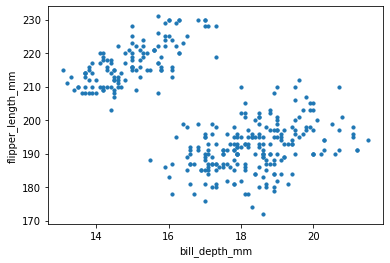

In [9]:
plt.scatter(X[:,1], X[:,2], s=10)
plt.xlabel('bill_depth_mm')
plt.ylabel('flipper_length_mm')
plt.show()

Now let's look at the full dataset. Visualizing the full $4$-dimensional data is not straightforward. One way to do this is to consider all pairwise scatter plots. We use the function [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) from the library [Seaborn](https://seaborn.pydata.org/index.html). 

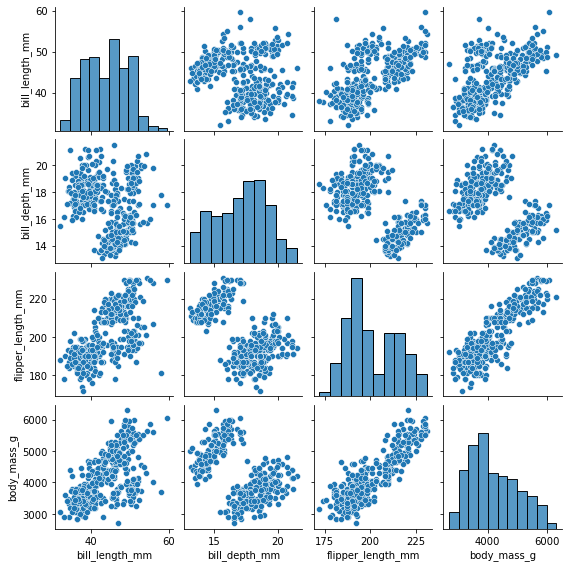

In [10]:
import seaborn as sns
sns.pairplot(df, vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], height=2)
plt.show()

## Background: review of basic linear algebra, calculus, and probability

**NUMERICAL CORNER:** In Numpy, a vector is defined as a 1d array. We first must import the [Numpy](https://numpy.org) package, which is often abbreviated by `np`.

In [2]:
import numpy as np
u = np.array([1., 3., 5. ,7.])
print(u)

[1. 3. 5. 7.]


To obtain the norm of a vector, we can use the function [`linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) (which requires the `numpy.linalg` package):

In [3]:
from numpy import linalg as LA
LA.norm(u)

9.16515138991168

which we check next "by hand"

In [4]:
np.sqrt(np.sum(u ** 2))

9.16515138991168

In Numpy, [`**`](https://numpy.org/doc/stable/reference/generated/numpy.power.html) indicates element-wise exponentiation.

**NUMERICAL CORNER:** We will often work with collections of $n$ vectors $\mathbf{x}_1, \ldots, \mathbf{x}_n$ in $\mathbb{R}^d$ and it will be convenient to stack them up into a matrix

$$
X =
\begin{bmatrix}
\mathbf{x}_1^T \\
\mathbf{x}_2^T \\
\vdots \\
\mathbf{x}_n^T \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1d} \\
x_{21} & x_{22} & \cdots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd} \\
\end{bmatrix}.
$$

To create a matrix out of two vectors, we use the function [`numpy.stack`](https://numpy.org/doc/stable/reference/generated/numpy.stack.html).

In [5]:
u = np.array([1., 3., 5., 7.])
v = np.array([2., 4., 6., 8.])
X = np.stack((u,v),axis=0)
print(X)

[[1. 3. 5. 7.]
 [2. 4. 6. 8.]]


Quoting the documentation:

> The axis parameter specifies the index of the new axis in the dimensions of the result. For example, if axis=0 it will be the first dimension and if axis=-1 it will be the last dimension.

The same scheme still works with more than two vectors.

In [6]:
u = np.array([1., 3., 5., 7.])
v = np.array([2., 4., 6., 8.])
w = np.array([9., 8., 7., 6.])
X = np.stack((u,v,w))
print(X)

[[1. 3. 5. 7.]
 [2. 4. 6. 8.]
 [9. 8. 7. 6.]]


**NUMERICAL CORNER:** In Numpy, the Frobenius norm of a matrix can be computed using the function [`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

In [7]:
A = np.array([[1., 0.],[0., 1.],[0., 0.]])
print(A)

[[1. 0.]
 [0. 1.]
 [0. 0.]]


In [8]:
LA.norm(A)

1.4142135623730951

**NUMERICAL CORNER:** The function $f(x) = x^2$ over $\mathbb{R}$ has a global minimizer at $x^* = 0$. Indeed, we clearly have $f(x) \geq 0$ for all $x$ while $f(0) = 0$. To plot the function, we use the [matplotlib](https://matplotlib.org) package, and specifically its function [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). We also use the function [`numpy.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create an array of evenly spaced numbers where we evaluate $f$.

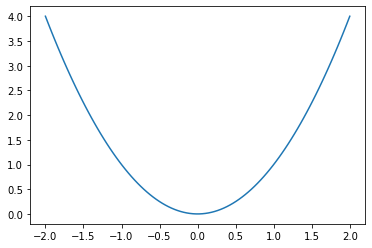

In [9]:
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [4.00, 2.25]
#plt.rcParams['figure.dpi'] = 200
x = np.linspace(-2,2,100)
y = x ** 2
plt.plot(x,y)
plt.show()

The function $f(x) = e^x$ over $\mathbb{R}$ does not have a global minimizer. Indeed, $f(x) > 0$ but no $x$ achieves $0$. And, for any $m > 0$, there is $x$ small enough such that $f(x) < m$. Note that $\mathbb{R}$ is *not* bounded, therefore the *Extreme Value Theorem* does not apply here.

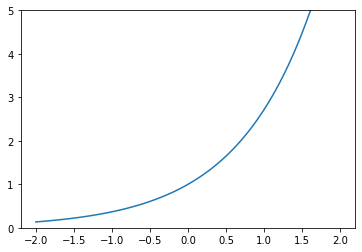

In [10]:
x = np.linspace(-2,2,100)
y = np.exp(x)
plt.plot(x,y)
plt.ylim(0,5)
plt.show()

The function $f(x) = (x+1)^2 (x-1)^2$ over $\mathbb{R}$ has two global minimizers at $x^* = -1$ and $x^{**} = 1$. Indeed, $f(x) \geq 0$ and $f(x) = 0$ if and only $x = x^*$ or $x = x^{**}$.

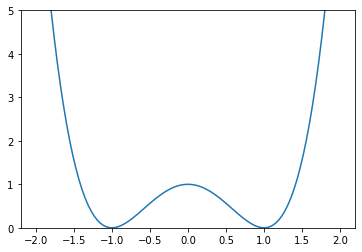

In [11]:
x = np.linspace(-2,2,100)
y = ((x+1)**2) * ((x-1)**2)
plt.plot(x,y)
plt.ylim(0,5)
plt.show()

**NUMERICAL CORNER:** We can use simulations to confirm the *Weak Law of Large Numbers*. Recall that a uniform random variable over the interval $[a,b]$ has density

$$
f_{X}(x)
= \begin{cases}
\frac{1}{b-a} & x \in [a,b] \\
0 & \text{o.w.}
\end{cases}
$$

We write $X \sim \mathrm{U}[a,b]$. We can obtain a sample from $\mathrm{U}[0,1]$ by using the function [`numpy.random`](https://numpy.org/doc/stable/reference/random/generator.html) in Numpy.  

In [12]:
from numpy.random import default_rng
rng = default_rng(535)
rng.random()

0.9836159914889122

Now we take $n$ samples from $\mathrm{U}[0,1]$ and compute their sample mean. We repeat $k$ times and display the empirical distribution of the sample means using an [histogram](https://en.wikipedia.org/wiki/Histogram).

In [13]:
def lln_unif(n, k):
    sample_mean = [np.mean(rng.random(n)) for i in range(k)]
    plt.hist(sample_mean,bins=15)
    plt.xlim(0,1)
    plt.title(f'n={n}')
    plt.show()

We start with $n=10$.

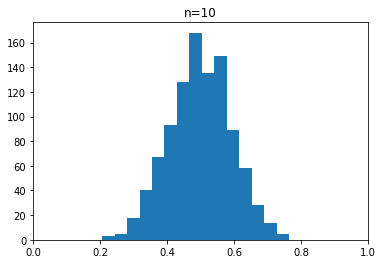

In [14]:
lln_unif(10, 1000)

Taking $n$ much larger leads to more concentration around the mean.

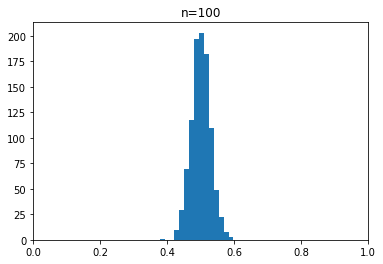

In [15]:
lln_unif(100, 1000)

**NUMERICAL CORNER:** We plot the PDF of a standard normal distribution. We use the function [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) from the [SciPy library](https://scipy.org), which outputs the PDF. The following code was adapted from [here](https://commons.wikimedia.org/wiki/File:Standard_Normal_Distribution.svg) with the help of ChatGPT.

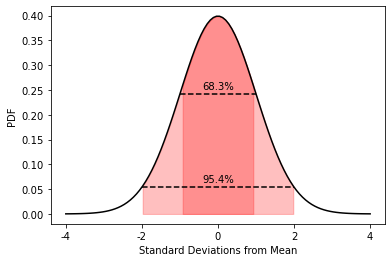

In [16]:
from scipy.stats import norm

# Plot the normal distribution curve
x = np.linspace(-4, 4, 100)
y = norm.pdf(x)
plt.plot(x, y, color='black')

# Fill areas under the curve for different standard deviations
plt.fill_between(x, y, where=(x > -1) & (x < 1), color='red', alpha=0.25)
plt.fill_between(x, y, where=(x > -2) & (x < 2), color='red', alpha=0.25)
plt.hlines(norm.pdf(1), -1, 1, color='black', linestyle='dashed')
plt.hlines(norm.pdf(2), -2, 2, color='black', linestyle='dashed')
plt.text(0, norm.pdf(1) + 0.01, "68.3%", ha='center')
plt.text(0, norm.pdf(2) + 0.01, "95.4%", ha='center')

# Set labels, title, and xticks
plt.xlabel("Standard Deviations from Mean")
plt.ylabel("PDF")
plt.xticks(range(-4, 5, 2), [f'{i}' for i in range(-4, 5, 2)])
plt.show()

**NUMERICAL CORNER:** The following function generates $n$ data points from a spherical $d$-dimensional Gaussians with variance $1$ and mean $w \mathbf{e}_1$. We will use it later in the chapter to simulate interesting datasets. 

Below, `rng.normal(0,1,d)` generates a `d`-dimensional spherical Gaussian with mean $\mathbf{0}$. Below we use the function [`numpy.concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) to create a vector by concatenating two given vectors. We use `[w]` to create a vector with a single entry `w`. We also use the function [`numpy.zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) to create an all-zero vector. 

In [17]:
def one_cluster(d, n, w):
    X = np.stack(
        [np.concatenate(([w], np.zeros(d-1))) + rng.normal(0,1,d) for _ in range(n)]
    )
    return X

We generate $100$ data points in dimension $d=2$.

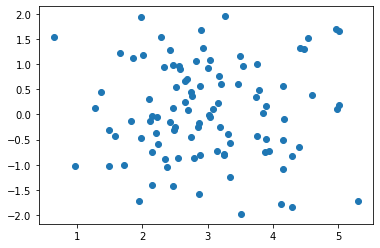

In [18]:
d, n, w = 2, 100, 3.
X = one_cluster(d, n, w)
plt.scatter(X[:,0], X[:,1])
plt.show()